In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
train_datagen =ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=30,
                                shear_range=0.3,
                                zoom_range=0.3,
                                width_shift_range=0.4,
                                height_shift_range=0.4,
                                horizontal_flip=True,
                                fill_mode="nearest")

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
                                                    './train/',
                                                    color_mode="grayscale",
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    class_mode="categorical",
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(  
                                                    './validation/',
                                                    color_mode="grayscale",
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    class_mode="categorical",
                                                    shuffle=True)

Found 7178 images belonging to 7 classes.


In [6]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [8]:
from livelossplot.inputs.tf_keras import PlotLossesCallback

checkpoint = ModelCheckpoint("Emotion_Model1.h5",
                            monitor='val_loss',
                            mode='max',
                            save_best_only=True,
                            verbose=1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.1,
                             patience=2,
                             verbose=1,
                             min_delta=0.0001)

In [9]:
callback = [PlotLossesCallback(), checkpoint, reduce_lr]

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

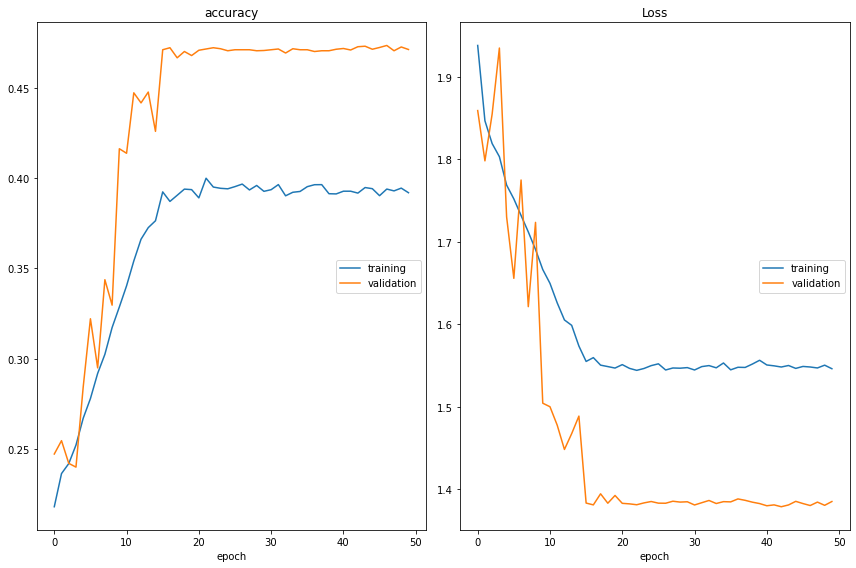

accuracy
	training         	 (min:    0.218, max:    0.400, cur:    0.392)
	validation       	 (min:    0.240, max:    0.473, cur:    0.471)
Loss
	training         	 (min:    1.544, max:    1.938, cur:    1.546)
	validation       	 (min:    1.379, max:    1.935, cur:    1.385)

Epoch 00050: val_loss did not improve from 1.93509
448/448 [==============================] - 336s 749ms/step - loss: 1.5463 - accuracy: 0.3919 - val_loss: 1.3853 - val_accuracy: 0.4713 - lr: 1.0000e-18


In [11]:
history = model.fit_generator(train_generator, epochs=50, steps_per_epoch=28709//64, callbacks=callback, validation_data=validation_generator, validation_steps=7178//64)